In [ ]:
%load_ext autoreload
%autoreload 2

In [61]:
import pickle
import numpy as np
import networkx as nx
import polars as pl
import pandas as pd

import matplotlib.pyplot as plt
from enso.data import read_noaa

In [62]:
with open("./sample2.pkl", "rb") as f:
    data = pickle.load(f)

In [63]:
# Read NINO data
fname = f"./data/nino34/noaa_nino34_anomaly.txt"

df = read_noaa(fname) 

q = (
    df.lazy()
    .melt(id_vars="year")
    .select(
        pl.date(pl.col("year"), pl.col("variable"), 1).alias("date"),
        pl.col("value").alias("nino34")
    )
    .sort(by="date")
    .drop_nulls()
)

tseries = q.collect()

In [64]:
sizes = np.array([len(d) for d in data])

In [66]:
taxis = pd.date_range(start=pd.to_datetime("1979-01-20"), end=pd.to_datetime("2021-12-31"), freq="D")
ind = (taxis.month == 2) & (taxis.day == 29)
taxis = taxis[~ind]

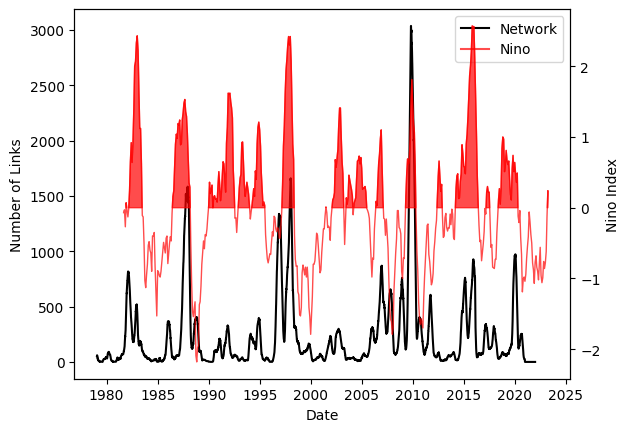

In [67]:
fig, ax = plt.subplots()

ax.plot(taxis, sizes, color="black", label="Network")
# ax.set_xticks(np.arange(1980, 1979 + len(sizes) // 365, 5))
ax.plot([], [], color="red", alpha=0.7, label="Nino")


axt = ax.twinx()
t = tseries["date"][-500:]
nino = tseries["nino34"][-500:]

axt.plot(t, nino, color="red", label="Nino", alpha=0.7, lw=1)
axt.set_ylabel("Nino Index")
axt.fill_between(t, nino, where=nino > 0, color="red", interpolate=True, alpha=0.7)

ax.set_xlabel("Date")
ax.set_ylabel("Number of Links")
ax.legend(loc="best")

plt.savefig("enso_network2.pdf", dpi=300)

plt.show()